In [113]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv("Wine.csv")

In [115]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [116]:
df.size

2492

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [118]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [119]:
df.shape

(178, 14)

In [120]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
target_name = ['class_0','class_1','class_2']

In [121]:
x.shape

(178, 13)

In [122]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [123]:
x_std[0]

array([ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
        0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
        0.36217728,  1.84791957,  1.01300893])

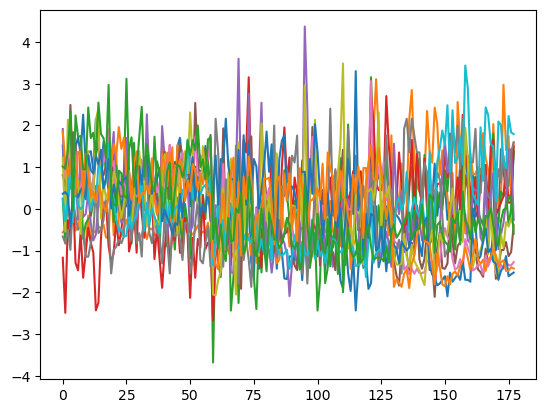

In [124]:
plt.plot(x_std)


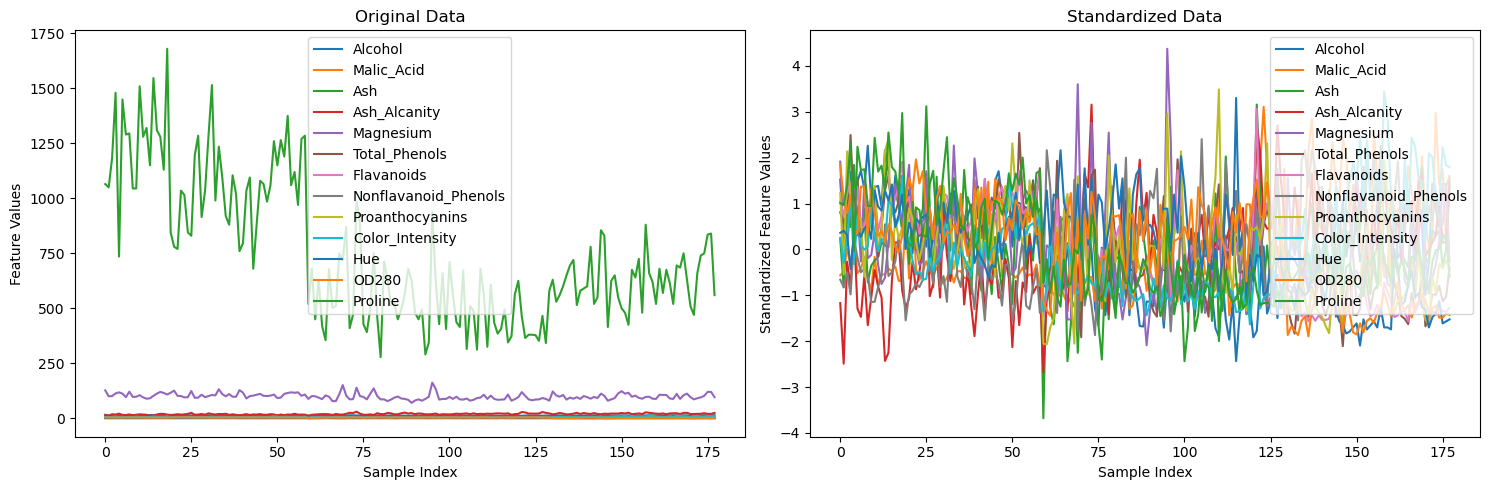

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot original data
axes[0].plot(x)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Feature Values')
axes[0].legend(x.columns)

# Plot standardized data
axes[1].plot(x_std)
axes[1].set_title('Standardized Data')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Standardized Feature Values')
axes[1].legend(x.columns)

plt.tight_layout()
plt.show()

In [138]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_std)

In [139]:
df_pca = pd.DataFrame(data=x_pca, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3', 'Principal Component 4','Principal Component 5'])
df_pca['Target'] = y

In [140]:
df_pca.shape

(178, 6)

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [148]:
lr = LogisticRegression()
x = df_pca.iloc[:,:-1]
y = df_pca.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=43)

In [149]:
lr.fit(x_train, y_train)


LogisticRegression()

In [150]:
y_pred = lr.predict(x_test)

In [151]:
print(f" accuracy score: {accuracy_score(y_test, y_pred) * 100 } %")

 accuracy score: 97.77777777777777 %


In [152]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 10]], dtype=int64)

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.94      1.00      0.97        15
           3       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

